In [114]:
from tensorflow.keras.models import load_model

loaded_model = load_model("com_imagens_maioresv3.h5")
test_data_dir = "/Users/userfolder/faculdade/slime-ia/Testes"


In [67]:
img_height = 700
img_width = 500
batch_size = 32

In [115]:
import matplotlib.pyplot as plt
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator()  # Rescale pixel values to [0, 1]

# Create a test generator
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),  # Adjust the target size to match your model's input size
    batch_size=batch_size,  # Batch size for generating predictions
    class_mode='categorical',  # Change this to 'binary' if you have a binary classification problem
    shuffle=True  # Set to False to maintain the order of images
)

# Get the class labels from the generator
class_labels = list(test_generator.class_indices.keys())

# Get a batch of test images and their corresponding true labels
images, true_labels = next(test_generator)

print(class_labels)

# Make predictions using the model
predictions = loaded_model.predict(images)



Found 751 images belonging to 4 classes.
['manga', 'manhua', 'novels', 'webcomic']
1/1 [==============================] - 2s 2s/step


In [116]:

# Convert the predicted probabilities to class labels
print(predictions)
predicted_labels = [class_labels[np.argmax(pred)] for pred in predictions]

# Real label
labels_true = [class_labels[np.argmax(true)] for true in true_labels]


[[1.51018503e-05 9.98830974e-01 4.91451957e-17 1.15388655e-03]
 [4.78704862e-07 9.99989986e-01 1.00144661e-07 9.48110028e-06]
 [2.53269434e-07 9.99955416e-01 2.43358667e-10 4.43527788e-05]
 [3.98017097e-15 1.00000000e+00 3.91107468e-36 3.95364275e-08]
 [9.99987960e-01 1.07135747e-05 1.29825706e-10 1.29980822e-06]
 [3.48060411e-07 9.99795735e-01 1.52798108e-09 2.03975418e-04]
 [3.00986835e-09 9.99962687e-01 5.01812546e-16 3.73225630e-05]
 [5.24556469e-07 9.99936700e-01 3.60427799e-11 6.28644120e-05]
 [1.15288759e-03 9.98108983e-01 1.14413997e-04 6.23731816e-04]
 [7.41132763e-12 9.99992609e-01 1.30163048e-32 7.40013502e-06]
 [1.08350655e-07 9.99048889e-01 1.52057739e-12 9.50961374e-04]
 [8.62519026e-01 6.65659755e-02 6.60116524e-02 4.90333606e-03]
 [7.18980285e-15 9.99999881e-01 1.50946288e-31 1.04489544e-07]
 [8.05612712e-04 9.97521222e-01 1.09235710e-03 5.80767344e-04]
 [7.94182924e-05 9.98629332e-01 2.22180159e-08 1.29129051e-03]
 [4.02501355e-05 9.99433100e-01 6.59936603e-08 5.264916

In [118]:
# Calculate accuracy manually
correct_predictions = sum(1 for true, predicted in zip(labels_true, predicted_labels) if true == predicted)
total_predictions = len(labels_true)

accuracy = correct_predictions / total_predictions

# Print the accuracy
print(correct_predictions)
print(total_predictions)
print(f'Real Accuracy: {accuracy * 100:.2f}%')


30
31
Real Accuracy: 96.77%


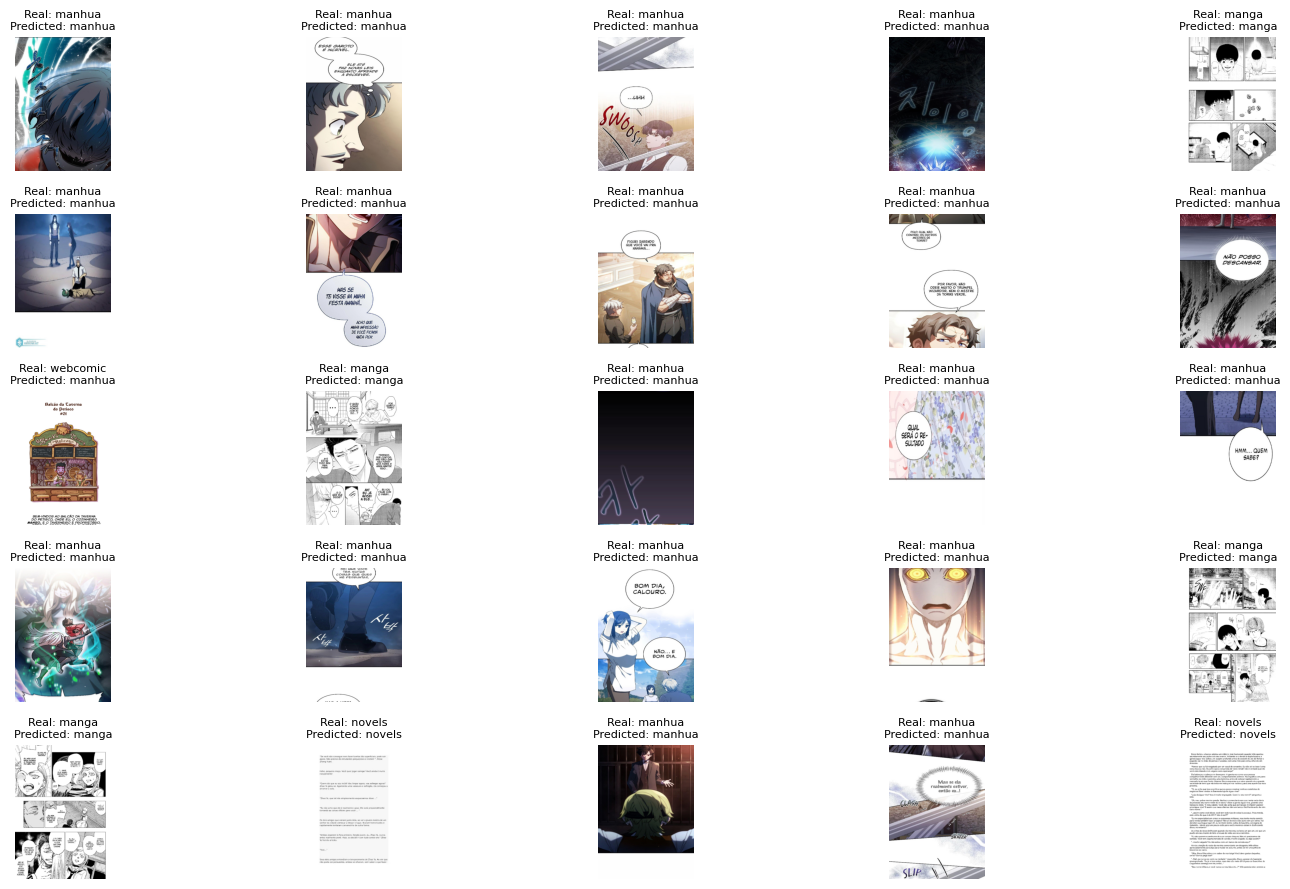

In [119]:

# Create a figure with multiple rows and columns to display images
num_rows = 5  # Number of rows of images to display
num_cols = 5  # Number of columns of images to display

# Create a figure to display the images
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 9))
for i in range(num_rows * num_cols):  # Display only 25 images
    ax = axes[i // num_cols, i % num_cols]
    if images[i].dtype == np.uint8:
        ax.imshow(images[i])
    else:
        ax.imshow(images[i] / 255.0)
    ax.set_title(f'Real: {labels_true[i]}\nPredicted: {predicted_labels[i]}', fontsize=8)
    ax.axis('off')

plt.tight_layout()
plt.show()